# Dog versus Cat
## Kaggle challenge

You can download the data here: https://www.kaggle.com/c/dogs-vs-cats/data

In [251]:
%matplotlib inline

import os
import glob
import itertools
import random

import matplotlib.pyplot as plt
from scipy.misc import toimage, imread, imresize
from sklearn.cross_validation import train_test_split
import numpy as np
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import np_utils

In [252]:
seed = 1137
np.random.seed(seed)
random.seed(seed)

In [221]:
img_width = 128
img_height = 128

### Load data set (feature + target)

In [222]:
def load_train(path, amount=None):
    """Load data set.
    Parameters
    ==========
    :path: Path to the data set.
    :amount: Amount (for each class: dog & cat) to load, if None, everything is loaded.
    Return
    ======
    One numpy array for the data, one for the target"""
    
    animals = {'dog': 0, 'cat': 1}
    
    # Animal is { dog | cat }
    def _load_image(path, animal):
        for img_path in glob.iglob(os.path.join(path, animal + '.*')):
            yield imresize(imread(img_path, flatten=False), (img_width, img_height))
        yield None
    
    test_amount = lambda i, amount: True if amount is None else i < amount
    
    def _load_animal(path, animal, amount, x_train, y_train):
        for i, img in enumerate(_load_image(path, animal)):
            if not test_amount(i, amount) or img is None:
                break
            x_train.append(img)
            y_train.append(animals[animal])
    
    x_train = []
    y_train = []
    
    _load_animal(path, 'dog', amount, x_train, y_train)
    _load_animal(path, 'cat', amount, x_train, y_train)

    return x_train, y_train

In [312]:
x_train, y_train = load_train('train', amount=10)

In [313]:
x_train = np.array(x_train)
x_train = x_train.reshape(x_train.shape[0], 3, img_width, img_height)
x_train = x_train.astype('float32')
x_train /= 255

y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train, 2)

In [314]:
print('Data:', x_train.shape)
print("With: number of observations, 3 layers for RGB, image's width, image's height")
print('Target:', y_train.shape)

Data: (20, 3, 128, 128)
With: number of observations, 3 layers for RGB, image's width, image's height
Target: (20, 2)


In [315]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train,
                                                    test_size=0.2,
                                                    random_state=seed)

In [316]:
print('Train:', len(x_train))
print('Test:', len(x_test))

Train: 16
Test: 4


In [317]:
model = Sequential()
model.add(Convolution2D(32, 3, 3,
                        input_shape=(3, img_width, img_height)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [318]:
batch_size = 32
nb_epoch = 10
verbose = 1

In [319]:
model.fit(x_train, y_train, batch_size=batch_size,
          nb_epoch=nb_epoch, verbose=verbose,
          validation_data=(x_test, y_test))

Train on 16 samples, validate on 4 samples
Epoch 1/10
16/16 [==============================] - 0s - loss: 0.7048 - acc: 0.4688 - val_loss: 4.1446 - val_acc: 0.5000
Epoch 2/10
16/16 [==============================] - 0s - loss: 4.7346 - acc: 0.5312 - val_loss: 0.5993 - val_acc: 0.7500
Epoch 3/10
16/16 [==============================] - 0s - loss: 2.4636 - acc: 0.4062 - val_loss: 0.8242 - val_acc: 0.2500
Epoch 4/10
16/16 [==============================] - 0s - loss: 0.9229 - acc: 0.4688 - val_loss: 0.5973 - val_acc: 1.0000
Epoch 5/10
16/16 [==============================] - 0s - loss: 0.7446 - acc: 0.5312 - val_loss: 0.7545 - val_acc: 0.2500
Epoch 6/10
16/16 [==============================] - 0s - loss: 0.6087 - acc: 0.6562 - val_loss: 0.6428 - val_acc: 0.6250
Epoch 7/10
16/16 [==============================] - 0s - loss: 0.6185 - acc: 0.6250 - val_loss: 0.6584 - val_acc: 0.5000
Epoch 8/10
16/16 [==============================] - 0s - loss: 0.4592 - acc: 0.8750 - val_loss: 0.6881 - val_a

In [305]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)

In [306]:
print('Loss:', loss)
print("Accuracy:", acc)

Loss: 0.667937950611
Accuracy: 0.599375


In [328]:
def predict_random_image(path, model):
    img_path = os.path.join(path, random.choice(os.listdir(path)))
    img = imresize(imread(img_path, flatten=False), (img_width, img_height))
    
    arr = np.array([img])
    #arr = x_train.reshape(3, img_width, img_height)
    arr = x_train.astype('float32')
    arr /= 255
    
    prediction = model.predict_classes(arr)
    return img, prediction

16/16 [==============================] - 0s
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


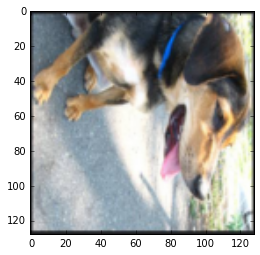

In [329]:
img, prediction = predict_random_image('test1', model)
plt.imshow(img)
print(prediction)

array([1])